# Credit One - Clasificación

## Gerardo Alvarado A.

In [1]:
#imports

#libraries
import pandas as pd
import numpy as np
import matplotlib as mplot
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn



#sklearn functions
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#estimators
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix

#cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Sqrt
from math import sqrt


## Prepación de los datos
#### Carga de los datos y eliminación de la columna ID

In [2]:
rawData = pd.read_csv('default of credit card clients.csv', header =1)
rawData.drop(rawData.columns[0], axis=1, inplace=True)
rawData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


#### Cambio de nombre de la variable para el manejo práctico de los datos
#### Reemplazo de los valores en la variable "Education" para el agrupamiento de los mismos

In [3]:
rawData=rawData.rename(columns = {'default payment next month':'DEFAULT'})

In [4]:
rawData.replace({"EDUCATION":{6:0}}, inplace = True)
rawData.replace({"EDUCATION":{5:0}}, inplace = True)
rawData.replace({"EDUCATION":{4:0}}, inplace = True)

## Matriz de Correlación
#### Creación de Matriz de Correlación para validar las relaciones entre las variables
#### Identificar las variables que se pueden eliminar para la elaboración de los modelos

In [5]:
corr_matrix = rawData.corr().round(decimals=2)
corr_matrix

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
LIMIT_BAL,1.00,0.02,-0.25,-0.11,0.14,-0.27,-0.30,-0.29,-0.27,-0.25,...,0.29,0.30,0.29,0.20,0.18,0.21,0.20,0.22,0.22,-0.15
SEX,0.02,1.00,0.01,-0.03,-0.09,-0.06,-0.07,-0.07,-0.06,-0.06,...,-0.02,-0.02,-0.02,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,-0.04
EDUCATION,-0.25,0.01,1.00,-0.15,0.18,0.13,0.16,0.15,0.14,0.13,...,-0.02,-0.02,-0.02,-0.05,-0.04,-0.06,-0.04,-0.05,-0.06,0.07
MARRIAGE,-0.11,-0.03,-0.15,1.00,-0.41,0.02,0.02,0.03,0.03,0.04,...,-0.02,-0.03,-0.02,-0.01,-0.01,-0.00,-0.01,-0.00,-0.01,-0.02
AGE,0.14,-0.09,0.18,-0.41,1.00,-0.04,-0.05,-0.05,-0.05,-0.05,...,0.05,0.05,0.05,0.03,0.02,0.03,0.02,0.02,0.02,0.01
PAY_0,-0.27,-0.06,0.13,0.02,-0.04,1.00,0.67,0.57,0.54,0.51,...,0.18,0.18,0.18,-0.08,-0.07,-0.07,-0.06,-0.06,-0.06,0.32
PAY_2,-0.30,-0.07,0.16,0.02,-0.05,0.67,1.00,0.77,0.66,0.62,...,0.22,0.22,0.22,-0.08,-0.06,-0.06,-0.05,-0.04,-0.04,0.26
PAY_3,-0.29,-0.07,0.15,0.03,-0.05,0.57,0.77,1.00,0.78,0.69,...,0.23,0.23,0.22,0.00,-0.07,-0.05,-0.05,-0.04,-0.04,0.24
PAY_4,-0.27,-0.06,0.14,0.03,-0.05,0.54,0.66,0.78,1.00,0.82,...,0.25,0.24,0.24,-0.01,-0.00,-0.07,-0.04,-0.03,-0.03,0.22
PAY_5,-0.25,-0.06,0.13,0.04,-0.05,0.51,0.62,0.69,0.82,1.00,...,0.27,0.27,0.26,-0.01,-0.00,0.01,-0.06,-0.03,-0.02,0.20


## Graficación de Matriz de correlación

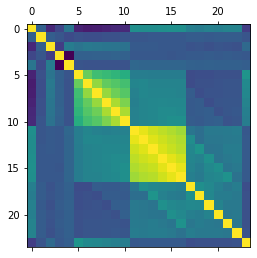

In [6]:
plt.matshow(rawData.corr().round(decimals=2))
plt.show()

#### Se observa alta correlación entre las variables de "BILL_AMT", por lo que se procede a eliminar todas las variable

In [7]:
#Creación de una variable de datos eliminando las columnas de BILL_AMT
credit = rawData.drop(["BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"],axis = 1, inplace = False)

In [8]:
#Selección de features y dependant variable
X = credit.drop('DEFAULT', axis=1)
y = credit['DEFAULT']

In [9]:
#Creación de las particiones
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
X_scaled = preprocessing.scale(X_train)

## Desarrollo de los modelos

In [11]:
#Creación de las variables de los Modeloss
modelSVC = SVC(kernel='linear')
modelKNN = KNeighborsClassifier(n_neighbors=5)
modelDTree = DecisionTreeClassifier(random_state=0, max_depth=3)

## SVC Support Vector Clasifier

In [12]:
modelSVC.fit(X_scaled,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

## KNN  K Nearest Neighbor

In [13]:
modelKNN.fit(X_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Decision Tree

In [14]:
modelDTree.fit(X_scaled,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

## Validación de los modelos

### Validación de SVC

In [15]:
#Validación de SVC
print(cross_val_score(modelSVC, X_scaled, y_train))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.80986667 0.80733333 0.81013333]


### Validación de KNN

In [16]:
print(cross_val_score(modelKNN, X_scaled, y_train))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.78853333 0.79386667 0.78853333]


### Validación de Decision Tree

In [17]:
print(cross_val_score(modelDTree, X_scaled, y_train))

[0.81906667 0.82186667 0.82213333]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


#### De los modelos valorados el Decision Tree fue el que mostró los mejores indicadores
#### por esta razón se utilizará para realizar la predicción

## Predicciones

In [18]:
X_scaled_test = preprocessing.scale(X_test)

In [19]:
predictions = modelDTree.predict(X_scaled_test)

In [20]:
rmse = sqrt(mean_squared_error(y_test, predictions))
predRsquared = r2_score(y_test,predictions)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.031
RMSE: 0.422


## Graficación de los resultados

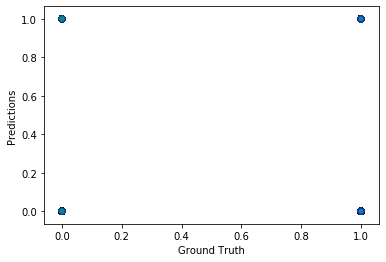

In [21]:
plt.scatter(y_test, predictions, edgecolor=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

#### El gráfico muestra que los valores generados por el modelo son correctos
#### Una vez generado se realizará la valoración de los resultados generados

In [22]:
print(predictions)

[0 1 0 ... 0 0 0]


## Matriz de confusión

In [23]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[5523  315]
 [1019  643]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5838
           1       0.67      0.39      0.49      1662

    accuracy                           0.82      7500
   macro avg       0.76      0.67      0.69      7500
weighted avg       0.81      0.82      0.80      7500



#### La matriz de confusión nos indica que hay una precisión alta en la predicción de los resultados generados
#### Por los resultados de la predicción, se puede identificar que existe una menor cantidad de clientes que presentarán retraso
#### en los pagos de los créditos, de acuerdo al modelo desarrollado
